<a href="https://colab.research.google.com/github/solharsh/Experimenting_ML/blob/master/Fault_Detection_Analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import pandas as pd

In [258]:
from pandas import read_excel
my_sheet = 'Data' 
file_name = '/content/drive/My Drive/Computer_vision/GreatFarms Inc Fault Analytics Case.xlsx'
df = read_excel(file_name, sheet_name = my_sheet)

In [259]:
df.head()

,Fault No,Status,MSN,CreationDate,ProductType,Disposition,Factory Code,Category,Side,FrameFrom,FrameTo,CrossFrom,CrossTo,FaultCodeGroup,FaultCode,FaultCodeDescription,CauseCodeGroup,CauseCode,CauseCodeDescription
0,JK-00100051,ACC,458,2019-12-03,K560-200,Acceptable after further work performed,JK,STRUCTURE,NaN,20.0,41,NaN,NaN,NC-DC-F,FCA,Shape geometry deviating,NC-CC-E,E5,No Fault Found (NFF)
1,JK-00100081,ACC,467,2019-12-03,K590-500,Acceptable as is,JK,STRUCTURE,RIGHT SIDE,30.0,30,32.0,34.0,NC-DC-B,BBA,Measure out of tolerance,NC-CC-E,E5,No Fault Found (NFF)
2,RA-00100118,ACC,434,2019-12-04,K590-500,Acceptable after further work performed,RA,STRUCTURE,RIGHT SIDE,NaN,NaN,NaN,NaN,NC-DC-F,FCB,Stringer displacement,NC-CC-G,G1,Working error
3,DN-00100369,ACC,0,2019-12-03,K590-500,Acceptable after further work performed,DN,NaN,NaN,NaN,NaN,NaN,NaN,NC-DC-F,FCG,Not sufficient flatness,NC-CC-C,C4,Process/Method not applicable
4,JK-00100837,ACC,447,2019-12-03,K560-200,Acceptable as is,JK,STRUCTURE,RIGHT SIDE,24.0,25,NaN,NaN,NC-DC-A,AO,Riveting,NC-CC-G,G1,Working error


1. Provide EDA on dataset
2. Clean up the dataset, filling in missing values as required
3. Define the problem based on the data
4. Build a ML model to predict faults
5. Visualize using graphs and provide insights

In [260]:
print('There are {} rows and {} columns in the dataset.'.format(df.shape[0],df.shape[1]))

There are 5803 rows and 19 columns in the dataset.


In [261]:
#printing the name of columns
df.columns

Index(['Fault No', 'Status', 'MSN', 'CreationDate', 'ProductType',
       'Disposition', 'Factory Code', 'Category', 'Side', 'FrameFrom',
       'FrameTo', 'CrossFrom', 'CrossTo', 'FaultCodeGroup', 'FaultCode',
       'FaultCodeDescription', 'CauseCodeGroup', 'CauseCode',
       'CauseCodeDescription'],
      dtype='object')

# 1. EDA and MISSING VALUE TREATMENT

In [262]:
# This will print basic statistics for numerical columns
df.describe()

,MSN,FrameFrom,CrossFrom,CrossTo
count,5803.000000,3707.000000,3161.000000,2461.000000
mean,332.415819,48.179390,26.854476,28.599756
std,157.657739,26.584426,11.529723,11.355396
min,0.000000,19.000000,1.000000,1.000000
25%,354.000000,26.000000,16.000000,22.000000
50%,394.000000,36.000000,28.000000,30.000000
75%,427.000000,77.500000,36.000000,37.000000
max,499.000000,93.000000,46.000000,47.000000


In [263]:
#So, we've got a lot of columns that we need to understand. Knowing what the columns mean can help us a lot for better results.

In [264]:
#Checking the count of missing values and percentage

def null_values(df): #creates a function with below logic
        mis_val = df.isnull().sum() #gives sum of missing values (null values)
        mis_val_percent = 100 * df.isnull().sum() / len(df) #getting percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) #creating a DF containing missing value count and it's percentage
        mis_val_table_ren_columns = mis_val_table.rename( 
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #renaming the columns
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) #getting the percentage of missing values in descending order and rounding it to 1 decimal
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.") #printing number of columns and missing value count
        return mis_val_table_ren_columns

In [265]:
# Missing values statistics
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 19 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
FrameTo,3757,64.7
CrossTo,3342,57.6
CrossFrom,2642,45.5
FrameFrom,2096,36.1
Side,1875,32.3
Category,1845,31.8
FaultCodeGroup,1395,24.0
FaultCode,1395,24.0
CauseCodeGroup,1395,24.0
CauseCode,1395,24.0


In [266]:
#First calculate the percentage of missing data for each feature:
missing_features = df.isnull().mean().sort_values(ascending=False)
print(missing_features)

FrameTo                 0.647424
CrossTo                 0.575909
CrossFrom               0.455282
FrameFrom               0.361192
Side                    0.323109
Category                0.317939
CauseCode               0.240393
CauseCodeDescription    0.240393
FaultCodeGroup          0.240393
FaultCode               0.240393
CauseCodeGroup          0.240393
ProductType             0.075134
FaultCodeDescription    0.000000
Factory Code            0.000000
Disposition             0.000000
CreationDate            0.000000
MSN                     0.000000
Status                  0.000000
Fault No                0.000000
dtype: float64


Columns with missing values: 

FrameTo                 
CrossTo                 
CrossFrom               
FrameFrom               
Side                    
Category                
CauseCode               
CauseCodeDescription    
FaultCodeGroup          
FaultCode               
CauseCodeGroup          
ProductType             

Text(0, 0.5, 'Feature count')

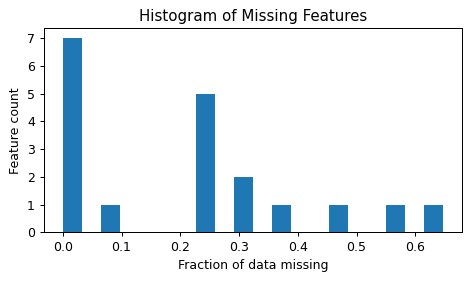

In [267]:
#Let's visualize the distribution of missing data percentages:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3), dpi=90)
missing_features.plot.hist(bins=20)
plt.title('Histogram of Missing Features')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

In [268]:
for col in df: 
  print('Name of the feature:',col)
  print('Unique values:')
  print(df[col].unique())
  print('------')

Name of the feature: Fault No
Unique values:
['JK-00100051' 'JK-00100081' 'RA-00100118' ... 'RA-00999324' 'RA-00999470'
 'RA-00999811']
------
Name of the feature: Status
Unique values:
['ACC' 'DIF' 'INP']
------
Name of the feature: MSN
Unique values:
[458 467 434   0 447 446 445 459 473 448 368 468 444 457 465 443 455 456
 427 356 476 466 433 471 438 436 451 450 426 461 370 430 452 478 416 440
 453 428 442 431 474 423 472 429 432 449 463 464 382 470 462 439 435 469
 493 477 441 425 414 410 479 484 408 415 375 409 424 389 422 339 403 402
 437 418 419 420 386 372 412 394 481 397 486 411 348 421 417 407 475 454
  71 482 405 381 395 401 400 340 406 358 485 404  65 380 398 413 399 378
 396 388 342 332 383 314 363 392 362 374 369 391 376 346 390 364 371 373
 334 393 365 306 366 385 387 326 379 338 352 357 355 359 354 350 325 321
 318 316 343 344 345 347 349 351 341 322 337 335 320 327 328 333 329 331
 323 324 330 336 308 295 273 249 319 315 262 483 499]
------
Name of the feature: Creation

In [269]:
df.columns

Index(['Fault No', 'Status', 'MSN', 'CreationDate', 'ProductType',
       'Disposition', 'Factory Code', 'Category', 'Side', 'FrameFrom',
       'FrameTo', 'CrossFrom', 'CrossTo', 'FaultCodeGroup', 'FaultCode',
       'FaultCodeDescription', 'CauseCodeGroup', 'CauseCode',
       'CauseCodeDescription'],
      dtype='object')

# Data Dictionary for self reference

- Fault No: Just a serial number to give to the occured faults (but seems not relevant)
- Status: 3 Kinds of fault can occur (Not sure what ACC, DIF, INP mean)
- MSN: It has values ranging from 0 to 499 (Not sure what MSN means)
- Creation date: Self explanatory (but not that relevant in terms of year as everything is manufacturer in 2019, can take months for analysis)
- ProductType: Data for 2 kinds of products available (few missing values are there too, can't imputer without any logic)
- Disposition: 3 kinds of disposition possible (however, confused between two as they mean the same thing: Acceptable after further work performed and acceptable as is with work performed)
- Factory code: 3 factories are used for manufacturing of these products (JK, RA, DN)
- Category: 2 Categories (Fuel System and Structure with missing values)
- Side: Probably shows what side is the component for (6 possible 4 can be merged as they are redundant (left/left side and right/right side))
- Frame from: Not sure what this means (probably dimension of a frame that starts from this value)
- Frame to: Not sure what this means (probably dimension of a frame that ends at this value)
- Cross from: Something similar to Frame from
- Cross to: Something similar to Frame to
- Fault code group: Major category of fault (10 categories possible)
- Fault code: Exact type of fault
- Fault code Description: Many possible, can't get anything significant out of it
- Cause code group: Major category of cause of fault
- Cause code: exact type of cause of fault
- Cause code description: Text field`

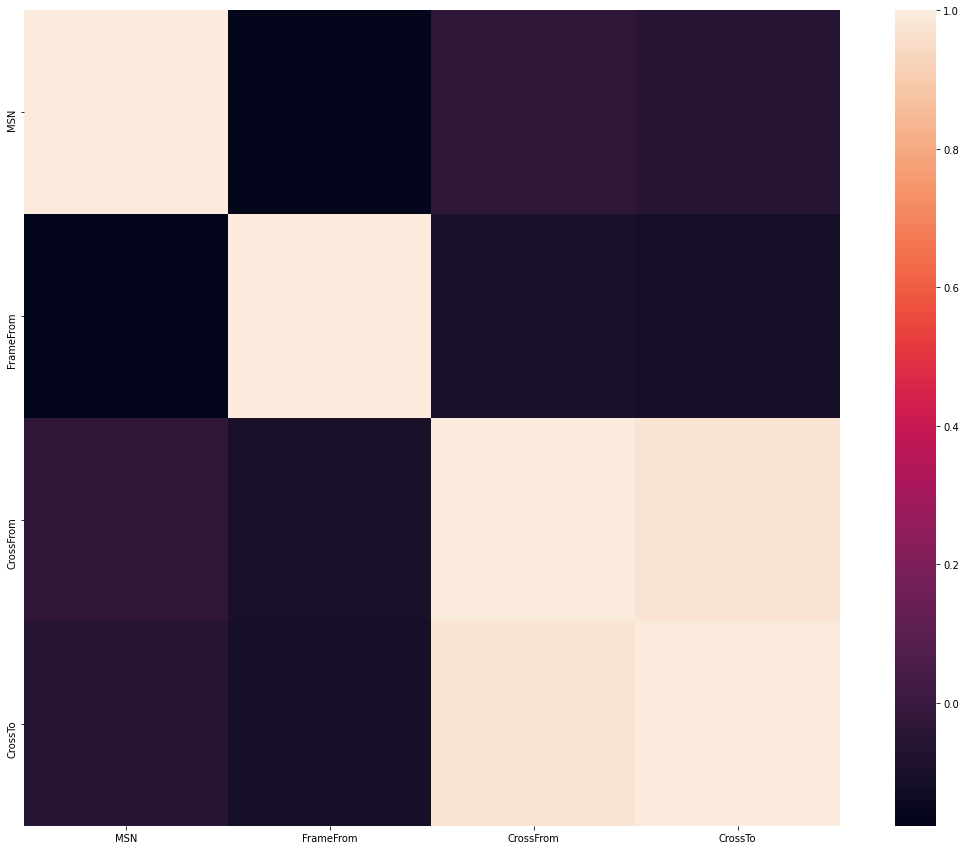

In [270]:
import seaborn as sns
cor = df.corr() #Checking corelation between features
plt.subplots(figsize=(20,15)) #giving figure size parameters
sns.heatmap(cor, square = True) #plotting heatmap to check corelation

From the above heatmap we can observe that there is a high correlation between quite a CrossFrom and CrossTo
Therefore, instead of keeping both. I have to figure out a way to eliminate one column to reduce multicollinearity.



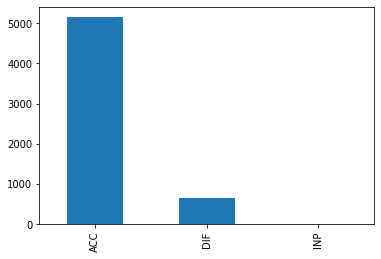

In [271]:
df['Status'].value_counts().plot.bar()
plt.show()

imbalanced data for the status column

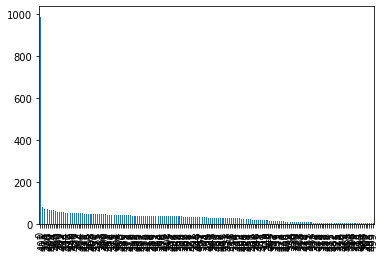

In [272]:
df['MSN'].value_counts().plot.bar()
plt.show()

In [273]:
def check_stats(col): #creating function to check head of column, check it's statistics and do a value count
  print(df[col].head())
  print(df[col].describe())
  print(df[col].value_counts())

In [274]:
#function to get month from the creation date as entire value for creation date is not useful

import datetime

now = datetime.datetime.today() #prints current date
def credit_age (x):
    if x != 'nan': #filter non null
        c1 = datetime.datetime.strptime(x, '%Y-%m-%d') #strips the present date in mon-year format 
        c1 = c1.month
        return c1
        #return c1
    else:
        return None

In [275]:
df['CreationDate'] = df['CreationDate'].astype(str)
df['month'] = df['CreationDate'].apply(credit_age)

In [276]:
df['month'].value_counts()

1     590
11    571
3     568
2     557
7     511
10    498
5     483
6     461
4     456
12    397
9     390
8     321
Name: month, dtype: int64

In [277]:
#dropping fault no column as it's just a number assigned (just like serial number)
drop_list = ['Fault No']
df = df.drop(drop_list,axis=1)

In [278]:
#dropping creation date as it is not useful anymore
drop_list1 = ['CreationDate']
df = df.drop(drop_list1,axis=1)

In [279]:
df.head()

,Status,MSN,ProductType,Disposition,Factory Code,Category,Side,FrameFrom,FrameTo,CrossFrom,CrossTo,FaultCodeGroup,FaultCode,FaultCodeDescription,CauseCodeGroup,CauseCode,CauseCodeDescription,month
0,ACC,458,K560-200,Acceptable after further work performed,JK,STRUCTURE,NaN,20.0,41,NaN,NaN,NC-DC-F,FCA,Shape geometry deviating,NC-CC-E,E5,No Fault Found (NFF),12
1,ACC,467,K590-500,Acceptable as is,JK,STRUCTURE,RIGHT SIDE,30.0,30,32.0,34.0,NC-DC-B,BBA,Measure out of tolerance,NC-CC-E,E5,No Fault Found (NFF),12
2,ACC,434,K590-500,Acceptable after further work performed,RA,STRUCTURE,RIGHT SIDE,NaN,NaN,NaN,NaN,NC-DC-F,FCB,Stringer displacement,NC-CC-G,G1,Working error,12
3,ACC,0,K590-500,Acceptable after further work performed,DN,NaN,NaN,NaN,NaN,NaN,NaN,NC-DC-F,FCG,Not sufficient flatness,NC-CC-C,C4,Process/Method not applicable,12
4,ACC,447,K560-200,Acceptable as is,JK,STRUCTURE,RIGHT SIDE,24.0,25,NaN,NaN,NC-DC-A,AO,Riveting,NC-CC-G,G1,Working error,12


In [280]:
check_stats('Status')

0    ACC
1    ACC
2    ACC
3    ACC
4    ACC
Name: Status, dtype: object
count     5803
unique       3
top        ACC
freq      5148
Name: Status, dtype: object
ACC    5148
DIF     653
INP       2
Name: Status, dtype: int64


In [281]:
check_stats('MSN')

0    458
1    467
2    434
3      0
4    447
Name: MSN, dtype: int64
count    5803.000000
mean      332.415819
std       157.657739
min         0.000000
25%       354.000000
50%       394.000000
75%       427.000000
max       499.000000
Name: MSN, dtype: float64
0      989
402     81
415     72
374     71
388     68
      ... 
306      1
262      1
493      1
485      1
499      1
Name: MSN, Length: 175, dtype: int64


In [282]:
check_stats('ProductType')

0    K560-200
1    K590-500
2    K590-500
3    K590-500
4    K560-200
Name: ProductType, dtype: object
count         5367
unique           2
top       K560-200
freq          3593
Name: ProductType, dtype: object
K560-200    3593
K590-500    1774
Name: ProductType, dtype: int64


In [283]:
#Product type has seven percent missing values. Let's impute them majority class as the class is already imbalanced and it makes sense to impute with median.
obj_cols = df.columns[df.dtypes==object]
obj_cols

Index(['Status', 'ProductType', 'Disposition', 'Factory Code', 'Category',
       'Side', 'FrameTo', 'FaultCodeGroup', 'FaultCode',
       'FaultCodeDescription', 'CauseCodeGroup', 'CauseCode',
       'CauseCodeDescription'],
      dtype='object')

To deal with missing values in each column, I will do some data imputation dealing with each dtype differently. For dtype = object, I will use the most frequent values while for numerical dtypes, I will use the median

In [284]:
#Imputer function
imputer = lambda x:x.fillna(x.value_counts().index[0]) 

#Impute dtype=object with most frequent value
df[obj_cols] = df[obj_cols].apply(imputer) 

In [285]:
#Impute the rest of df with median
df = df.fillna(df.median(axis=0))

In [286]:
check_stats('FrameFrom')

0    20.0
1    30.0
2    36.0
3    36.0
4    24.0
Name: FrameFrom, dtype: float64
count    5803.000000
mean       43.780286
std        22.037552
min        19.000000
25%        30.000000
50%        36.000000
75%        40.000000
max        93.000000
Name: FrameFrom, dtype: float64
36.0    2222
20.0     407
89.0     198
30.0     176
22.0     153
71.0     145
21.0     144
29.0     138
72.0     128
27.0     117
35.0     110
87.0     106
37.0     104
28.0     104
40.0      99
24.0      95
39.0      93
38.0      89
77.0      88
82.0      76
86.0      69
23.0      69
34.0      68
85.0      64
83.0      64
79.0      53
90.0      53
31.0      53
33.0      51
92.0      49
84.0      48
25.0      48
32.0      43
26.0      39
81.0      33
78.0      31
76.0      30
91.0      28
88.0      26
80.0      22
74.0      22
73.0      18
41.0      10
75.0       9
93.0       7
70.0       3
19.0       1
Name: FrameFrom, dtype: int64


In [287]:
check_stats('FrameTo')

0    41
1    30
2    93
3    93
4    25
Name: FrameTo, dtype: object
count     5803
unique      49
top         93
freq      3959
Name: FrameTo, dtype: int64
93      3959
41       181
40       131
32       124
90       118
30        98
27        90
38        80
21        73
25        57
39        52
35        50
31        43
86        40
22        38
37        38
82        36
28        36
83        35
23        34
34        32
36        31
33        31
85        31
89        31
80        30
26        27
72        27
87        27
92        22
24        20
88        19
77        17
29        15
78        12
91        12
084A      12
077A      11
81        11
84        11
73         9
75         9
79         9
76         7
022A       7
74         6
20         6
94         5
71         3
Name: FrameTo, dtype: int64


There are following values which does not makes sense when compared to other values: 084A, 077A, 022A. Therefore, changing them as per format of others. 

In [288]:
df['FrameTo'].replace(['084A'], '84', inplace=True)
df['FrameTo'].replace(['077A'], '77', inplace=True)
df['FrameTo'].replace(['022A'], '22', inplace=True)

In [289]:
df['FrameFrom'] = df['FrameFrom'].astype(float)
df['FrameTo'] = df['FrameTo'].astype(float)
df['CrossFrom'] = df['CrossFrom'].astype(float)
df['CrossTo'] = df['CrossTo'].astype(float)

In [290]:
# calcualte mean FrameFrom, FrameTo value
df['Frame_avg'] = (df['FrameFrom'] + df['FrameTo'])/2
# calcualte mean CrossFrom, CrossTo value
df['Cross_avf'] = (df['CrossFrom'] + df['CrossTo'])/2
#Dropping the columns that are now transformed to new columns
drop_list2 = ['FrameFrom','FrameTo','CrossFrom','CrossTo']
df = df.drop(drop_list2,axis=1)

In [291]:
df.head()

,Status,MSN,ProductType,Disposition,Factory Code,Category,Side,FaultCodeGroup,FaultCode,FaultCodeDescription,CauseCodeGroup,CauseCode,CauseCodeDescription,month,Frame_avg,Cross_avf
0,ACC,458,K560-200,Acceptable after further work performed,JK,STRUCTURE,RIGHT SIDE,NC-DC-F,FCA,Shape geometry deviating,NC-CC-E,E5,No Fault Found (NFF),12,30.5,29.0
1,ACC,467,K590-500,Acceptable as is,JK,STRUCTURE,RIGHT SIDE,NC-DC-B,BBA,Measure out of tolerance,NC-CC-E,E5,No Fault Found (NFF),12,30.0,33.0
2,ACC,434,K590-500,Acceptable after further work performed,RA,STRUCTURE,RIGHT SIDE,NC-DC-F,FCB,Stringer displacement,NC-CC-G,G1,Working error,12,64.5,29.0
3,ACC,0,K590-500,Acceptable after further work performed,DN,STRUCTURE,RIGHT SIDE,NC-DC-F,FCG,Not sufficient flatness,NC-CC-C,C4,Process/Method not applicable,12,64.5,29.0
4,ACC,447,K560-200,Acceptable as is,JK,STRUCTURE,RIGHT SIDE,NC-DC-A,AO,Riveting,NC-CC-G,G1,Working error,12,24.5,29.0


In [292]:
check_stats('Disposition')

0    Acceptable after further work performed
1                           Acceptable as is
2    Acceptable after further work performed
3    Acceptable after further work performed
4                           Acceptable as is
Name: Disposition, dtype: object
count                 5803
unique                   3
top       Acceptable as is
freq                  2467
Name: Disposition, dtype: object
Acceptable as is                           2467
Acceptable after further work performed    2173
Acceptable as is with work performed       1163
Name: Disposition, dtype: int64


In [293]:
# I am assuming that that is the dependent variable that we are trying to predict. 
# Also, as two classes looks similar, I am combining them into one. Namely, Acceptable as is and Acceptable after further work performed
df['Disposition'].replace(['Acceptable as is with work performed'], 'Acceptable after further work performed', inplace=True)

In [294]:
disposition_map = {
    'Acceptable as is': 1,
    'Acceptable after further work performed': 0}

In [295]:
df['Disposition'] = df['Disposition'].map(disposition_map)

In [296]:
#let's see it again after above updates
check_stats('Disposition')

0    0
1    1
2    0
3    0
4    1
Name: Disposition, dtype: int64
count    5803.000000
mean        0.425125
std         0.494405
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Disposition, dtype: float64
0    3336
1    2467
Name: Disposition, dtype: int64


In [297]:
#Disposition counts as percentages:
df['Disposition'].value_counts(normalize=True, dropna=False)

0    0.574875
1    0.425125
Name: Disposition, dtype: float64

About 57% of the products are acceptable as they are and 42% needs work to be acceptable.



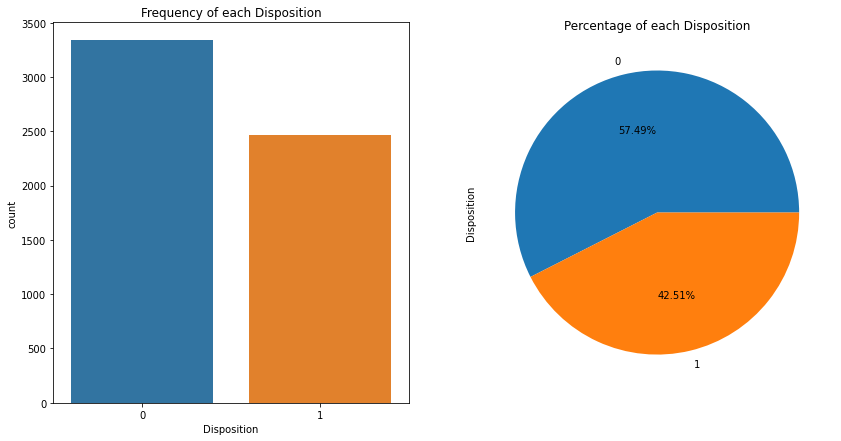

In [298]:
#Visualizing the Target Column Outcomes

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Disposition',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Disposition")
df.Disposition.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Disposition")
plt.show()

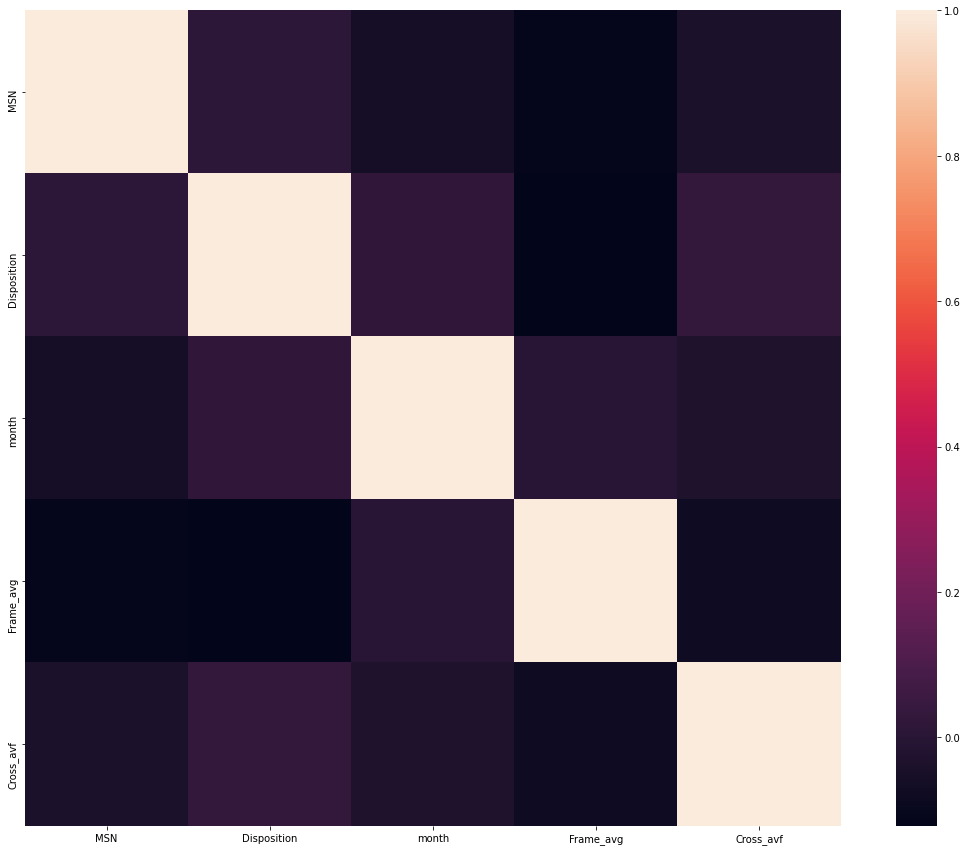

In [299]:
cor = df.corr() 
plt.subplots(figsize=(20,15))
sns.heatmap(cor, square = True)

In [300]:
missing_features = df.isnull().mean().sort_values(ascending=False)
print(missing_features)

Cross_avf               0.0
Frame_avg               0.0
month                   0.0
CauseCodeDescription    0.0
CauseCode               0.0
CauseCodeGroup          0.0
FaultCodeDescription    0.0
FaultCode               0.0
FaultCodeGroup          0.0
Side                    0.0
Category                0.0
Factory Code            0.0
Disposition             0.0
ProductType             0.0
MSN                     0.0
Status                  0.0
dtype: float64


In [301]:
#No more missing values are present now.

In [302]:
df['Cross_avf'].describe()

count    5803.000000
mean       28.391091
std         7.699811
min         1.000000
25%        27.500000
50%        29.000000
75%        31.500000
max        46.500000
Name: Cross_avf, dtype: float64

Cross_avf dimension ranges from 1 to 46.5, with a median of 29.

In [303]:
df.groupby('Disposition')['Cross_avf'].describe()

,count,mean,std,min,25%,50%,75%,max
Disposition,,,,,,,,
0,3336.0,28.187350,7.142350,1.0,27.5,29.0,29.5,46.5
1,2467.0,28.666599,8.388601,2.0,27.5,29.0,33.0,46.5


In [304]:
#This seems to have no effect on our disposition column. Can be deleted altogether. 

In [305]:
df['Frame_avg'].describe()

count    5803.000000
mean       61.253748
std        19.378052
min        20.000000
25%        57.000000
50%        64.500000
75%        66.000000
max        93.000000
Name: Frame_avg, dtype: float64

Frame_avg dimension ranges from 20 to 93, with a median of 64.

In [306]:
#Compare the disposition by frame_avg:
df.groupby('Disposition')['Frame_avg'].describe()

,count,mean,std,min,25%,50%,75%,max
Disposition,,,,,,,,
0,3336.0,63.281775,18.985915,20.0,60.0,64.5,79.5,93.0
1,2467.0,58.511350,19.568310,20.5,38.5,64.5,64.5,92.5


In [307]:
# Products that have faul (not acceptable as is have higher mean for the frame feature)

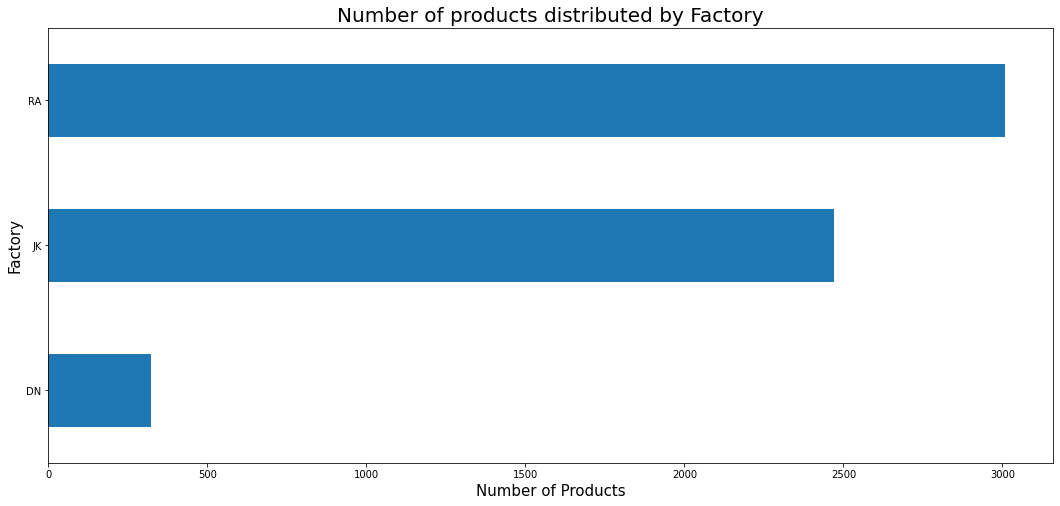

In [308]:
#Factory 
df['Factory Code'].value_counts().sort_values().plot(kind='barh',figsize=(18,8)) #plotting the bar to see the factory distribution
plt.title('Number of products distributed by Factory',fontsize=20) #plotting the title
plt.xlabel('Number of Products',fontsize=15) #plotting number of products for x axis
plt.ylabel('Factory',fontsize=15); #plotting factory for y axis

#Most number of products are developed at RA (I am guessing Ranchi factory)

Text(0.5, 1.0, 'Number of Open Credit Lines')

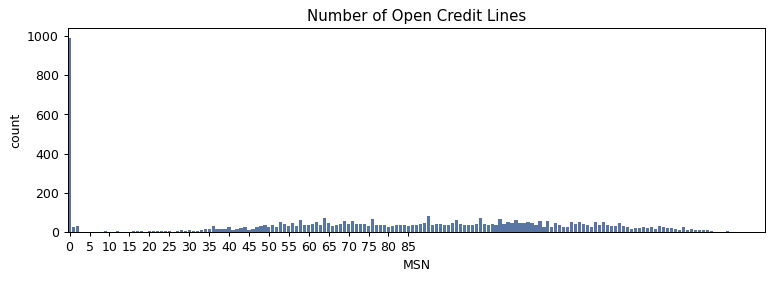

In [309]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(df['MSN'], order=sorted(df['MSN'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [310]:
#let's see the difference in number of credit lines between fully paid loans and charged-off loans
df.groupby('Disposition')['Factory Code'].describe()

,count,unique,top,freq
Disposition,,,,
0,3336,3,RA,1871
1,2467,3,JK,1258


In [311]:
#Most number of acceptable as is products are coming from JK Factory
#Most number of not acceptable products are coming from RA factory but could be because of the number of products manufactured there are more than other 2 factories

In [312]:
df.groupby('Disposition')['Status'].describe()

,count,unique,top,freq
Disposition,,,,
0,3336,2,ACC,2884
1,2467,3,ACC,2264


Text(0.5, 1.0, 'Number of Open Credit Lines')

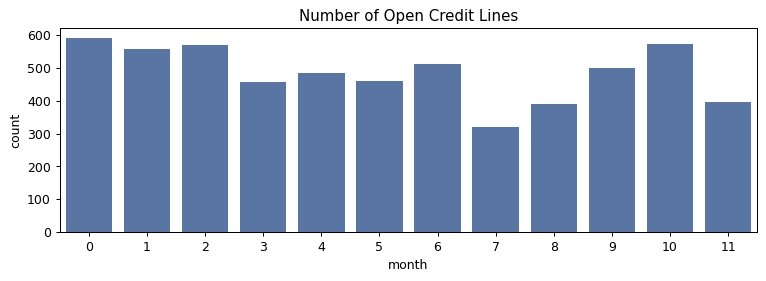

In [313]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(df['month'], order=sorted(df['month'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 12, 1), np.arange(0, 12, 1))
plt.title('Number of Open Credit Lines')

In [314]:
#Months seems to have no special effect on the disposition. However, it is observed that during mid months, the production is lesser.

In [315]:
df.groupby('Disposition')['ProductType'].describe()

,count,unique,top,freq
Disposition,,,,
0,3336,2,K560-200,2231
1,2467,2,K560-200,1798


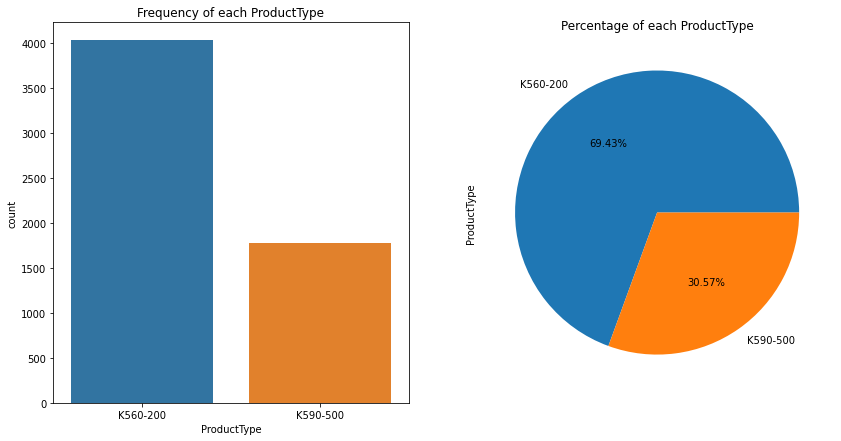

In [316]:
#Visualizing the ProductType Column Outcomes

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='ProductType',data=df,ax=axs[0])
axs[0].set_title("Frequency of each ProductType")
df.ProductType.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each ProductType")
plt.show()

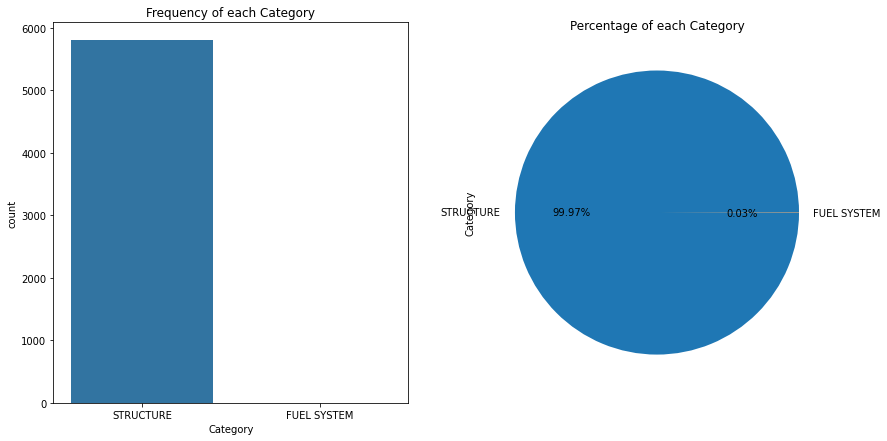

In [317]:
#Visualizing the Category Column Outcomes

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Category',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Category")
df.Category.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Category")
plt.show()

In [318]:
# Very few products belonging to fuel system category are present

In [319]:
  df['Side'].value_counts()

RIGHT SIDE             3913
LEFT SIDE              1510
RIGHT AND LEFT SIDE     323
IN A/C AXIS              36
RIGHT                    11
LEFT                     10
Name: Side, dtype: int64

In [320]:
#As the above feature has reduntant values, changing the name to make them similar. 

df['Side'].replace(['RIGHT SIDE'], 'RIGHT', inplace=True)
df['Side'].replace(['LEFT SIDE'], 'LEFT', inplace=True)

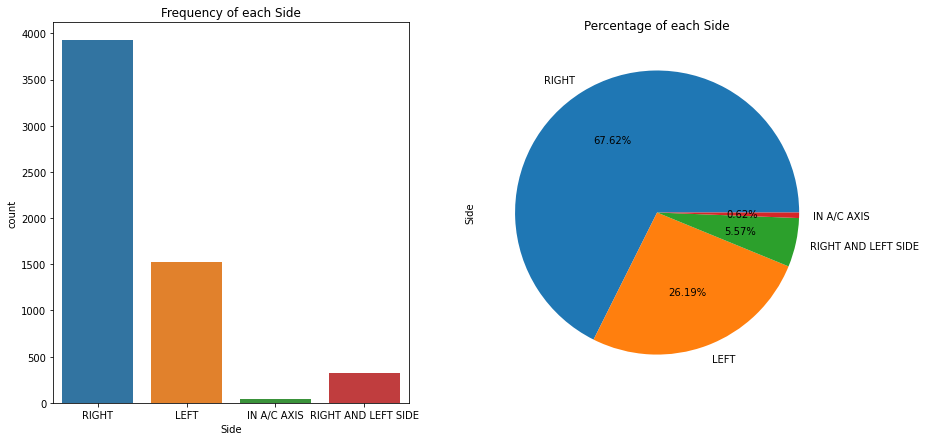

In [321]:
#Visualizing the Side Column Outcomes

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Side',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Side")
df.Side.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Side")
plt.show()

## Most number of products are for right side. 

In [322]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

Data types and their frequency
object     11
int64       3
float64     2
dtype: int64


# Processing Categorical Variables

In [323]:
#We have 11 object columns that contain text which need to be converted into numeric features.

#Let’s select just the object columns using the DataFrame method select_dtype, then display a sample row to get a better sense of how the values in each column are formatted.

df.select_dtypes(include='object')


,Status,ProductType,Factory Code,Category,Side,FaultCodeGroup,FaultCode,FaultCodeDescription,CauseCodeGroup,CauseCode,CauseCodeDescription
0,ACC,K560-200,JK,STRUCTURE,RIGHT,NC-DC-F,FCA,Shape geometry deviating,NC-CC-E,E5,No Fault Found (NFF)
1,ACC,K590-500,JK,STRUCTURE,RIGHT,NC-DC-B,BBA,Measure out of tolerance,NC-CC-E,E5,No Fault Found (NFF)
2,ACC,K590-500,RA,STRUCTURE,RIGHT,NC-DC-F,FCB,Stringer displacement,NC-CC-G,G1,Working error
3,ACC,K590-500,DN,STRUCTURE,RIGHT,NC-DC-F,FCG,Not sufficient flatness,NC-CC-C,C4,Process/Method not applicable
4,ACC,K560-200,JK,STRUCTURE,RIGHT,NC-DC-A,AO,Riveting,NC-CC-G,G1,Working error
...,...,...,...,...,...,...,...,...,...,...,...
5798,ACC,K560-200,RA,STRUCTURE,RIGHT,NC-DC-J,JE,Dimensions out of Tolerance,NC-CC-H,H6,Installation / Maladjustment
5799,ACC,K560-200,RA,STRUCTURE,RIGHT,NC-DC-A,AGA,Scratch or tool mark,NC-CC-G,G1,Working error
5800,ACC,K560-200,RA,STRUCTURE,RIGHT,NC-DC-J,JE,Dimensions out of Tolerance,NC-CC-H,H6,Installation / Maladjustment
5801,ACC,K560-200,RA,STRUCTURE,RIGHT,NC-DC-F,FEA,Deviating part thickness,NC-CC-G,G11,Part/jigs assembly error


In [324]:
cols = ['Status','ProductType','Factory Code','Category', 'Side', 'FaultCodeGroup','FaultCode','FaultCodeDescription','CauseCodeGroup','CauseCode','CauseCodeDescription']
for name in cols:
    print(name,':')
    print(df[name].value_counts(),'\n')

Status :
ACC    5148
DIF     653
INP       2
Name: Status, dtype: int64 

ProductType :
K560-200    4029
K590-500    1774
Name: ProductType, dtype: int64 

Factory Code :
RA    3008
JK    2471
DN     324
Name: Factory Code, dtype: int64 

Category :
STRUCTURE      5801
FUEL SYSTEM       2
Name: Category, dtype: int64 

Side :
RIGHT                  3924
LEFT                   1520
RIGHT AND LEFT SIDE     323
IN A/C AXIS              36
Name: Side, dtype: int64 

FaultCodeGroup :
NC-DC-A    3999
NC-DC-F     520
NC-DC-D     422
NC-DC-J     396
NC-DC-B     246
NC-DC-C     194
NC-DC-H       9
NC-DC-E       9
NC-DC-G       8
Name: FaultCodeGroup, dtype: int64 

FaultCode :
AGA    1731
AO      323
AHD     323
FCA     294
BBA     245
       ... 
AGB       1
AGJ       1
FH        1
GOA       1
CFA       1
Name: FaultCode, Length: 109, dtype: int64 

FaultCodeDescription :
Shape geometry deviating                    788
Thickness deviation/ size                   521
IncorrectFastener/Bolt/Scre

In [325]:
#Further, dropping 'Category' column altogether as it is highly dominated by one type. 
drop_list3 = ['Category']
df = df.drop(drop_list3,axis=1)

In [326]:
def filter_by_freq(df: pd.DataFrame, column: str, min_freq: int) -> pd.DataFrame:
    """Filters the DataFrame based on the value frequency in the specified column.

    :param df: DataFrame to be filtered.
    :param column: Column name that should be frequency filtered.
    :param min_freq: Minimal value frequency for the row to be accepted.
    :return: Frequency filtered DataFrame.
    """
    # Frequencies of each value in the column.
    freq = df[column].value_counts()
    # Select frequent values. Value is in the index.
    frequent_values = freq[freq >= min_freq].index
    # Return only rows with value frequency above threshold.
    return df[df[column].isin(frequent_values)]

In [330]:
filter_by_freq(df, 'CauseCodeDescription', 50)

,Status,MSN,ProductType,Disposition,Factory Code,Side,FaultCodeGroup,FaultCode,FaultCodeDescription,CauseCodeGroup,CauseCode,CauseCodeDescription,month,Frame_avg,Cross_avf
0,ACC,458,K560-200,0,JK,RIGHT,NC-DC-F,FCA,Shape geometry deviating,NC-CC-E,E5,No Fault Found (NFF),12,30.5,29.0
1,ACC,467,K590-500,1,JK,RIGHT,NC-DC-B,BBA,Measure out of tolerance,NC-CC-E,E5,No Fault Found (NFF),12,30.0,33.0
2,ACC,434,K590-500,0,RA,RIGHT,NC-DC-F,FCB,Stringer displacement,NC-CC-G,G1,Working error,12,64.5,29.0
3,ACC,0,K590-500,0,DN,RIGHT,NC-DC-F,FCG,Not sufficient flatness,NC-CC-C,C4,Process/Method not applicable,12,64.5,29.0
4,ACC,447,K560-200,1,JK,RIGHT,NC-DC-A,AO,Riveting,NC-CC-G,G1,Working error,12,24.5,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,ACC,0,K560-200,0,RA,RIGHT,NC-DC-J,JE,Dimensions out of Tolerance,NC-CC-H,H6,Installation / Maladjustment,12,64.5,29.0
5799,ACC,0,K560-200,0,RA,RIGHT,NC-DC-A,AGA,Scratch or tool mark,NC-CC-G,G1,Working error,12,64.5,29.0
5800,ACC,0,K560-200,0,RA,RIGHT,NC-DC-J,JE,Dimensions out of Tolerance,NC-CC-H,H6,Installation / Maladjustment,12,64.5,29.0
5801,ACC,0,K560-200,0,RA,RIGHT,NC-DC-F,FEA,Deviating part thickness,NC-CC-G,G11,Part/jigs assembly error,12,64.5,29.0
